In [60]:
import pandas as pd
import numpy as np
import csv

import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima_model import ARIMA

In [40]:
train = pd.read_csv('gemini_BTCUSD_2017_1min.csv', skiprows = [0])

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 8 columns):
Unix Timestamp    525600 non-null int64
Date              525600 non-null object
Symbol            525600 non-null object
Open              525600 non-null float64
High              525600 non-null float64
Low               525600 non-null float64
Close             525600 non-null float64
Volume            525600 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 32.1+ MB


In [42]:
train.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1514764740,2017-12-31 23:59:00,BTCUSD,13825.00,13825.00,13804.68,13820.26,2.610719
1,1514764680,2017-12-31 23:58:00,BTCUSD,13815.37,13825.00,13815.37,13825.00,3.547593
2,1514764620,2017-12-31 23:57:00,BTCUSD,13775.00,13815.37,13775.00,13815.37,18.437304
3,1514764560,2017-12-31 23:56:00,BTCUSD,13771.00,13775.00,13770.95,13775.00,7.538428
4,1514764500,2017-12-31 23:55:00,BTCUSD,13782.87,13782.87,13771.00,13771.00,1.657980


In [43]:
train['Unix_Timestamp'] = pd.to_datetime(train['Unix Timestamp'], unit='s')
train.Unix_Timestamp

0        2017-12-31 23:59:00
1        2017-12-31 23:58:00
2        2017-12-31 23:57:00
3        2017-12-31 23:56:00
4        2017-12-31 23:55:00
5        2017-12-31 23:54:00
6        2017-12-31 23:53:00
7        2017-12-31 23:52:00
8        2017-12-31 23:51:00
9        2017-12-31 23:50:00
10       2017-12-31 23:49:00
11       2017-12-31 23:48:00
12       2017-12-31 23:47:00
13       2017-12-31 23:46:00
14       2017-12-31 23:45:00
15       2017-12-31 23:44:00
16       2017-12-31 23:43:00
17       2017-12-31 23:42:00
18       2017-12-31 23:41:00
19       2017-12-31 23:40:00
20       2017-12-31 23:39:00
21       2017-12-31 23:38:00
22       2017-12-31 23:37:00
23       2017-12-31 23:36:00
24       2017-12-31 23:35:00
25       2017-12-31 23:34:00
26       2017-12-31 23:33:00
27       2017-12-31 23:32:00
28       2017-12-31 23:31:00
29       2017-12-31 23:30:00
                 ...        
525570   2017-01-01 00:29:00
525571   2017-01-01 00:28:00
525572   2017-01-01 00:27:00
525573   2017-

In [44]:
train.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Unix_Timestamp
0,1514764740,2017-12-31 23:59:00,BTCUSD,13825.00,13825.00,13804.68,13820.26,2.610719,2017-12-31 23:59:00
1,1514764680,2017-12-31 23:58:00,BTCUSD,13815.37,13825.00,13815.37,13825.00,3.547593,2017-12-31 23:58:00
2,1514764620,2017-12-31 23:57:00,BTCUSD,13775.00,13815.37,13775.00,13815.37,18.437304,2017-12-31 23:57:00
3,1514764560,2017-12-31 23:56:00,BTCUSD,13771.00,13775.00,13770.95,13775.00,7.538428,2017-12-31 23:56:00
4,1514764500,2017-12-31 23:55:00,BTCUSD,13782.87,13782.87,13771.00,13771.00,1.657980,2017-12-31 23:55:00


In [45]:
reorder_train = train.iloc[::-1]

In [46]:
reorder_train.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Unix_Timestamp
525599,1483228800,2017-01-01 00:00:00,BTCUSD,974.55,974.55,974.55,974.55,0.000000,2017-01-01 00:00:00
525598,1483228860,2017-01-01 00:01:00,BTCUSD,974.55,974.55,974.55,974.55,0.000000,2017-01-01 00:01:00
525597,1483228920,2017-01-01 00:02:00,BTCUSD,974.55,974.55,970.00,970.00,0.417679,2017-01-01 00:02:00
525596,1483228980,2017-01-01 00:03:00,BTCUSD,970.00,970.00,970.00,970.00,0.000514,2017-01-01 00:03:00
525595,1483229040,2017-01-01 00:04:00,BTCUSD,970.00,970.00,970.00,970.00,0.000000,2017-01-01 00:04:00


In [47]:
train1 = reorder_train.set_index('Unix_Timestamp')

In [48]:
train1.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
Unix_Timestamp,,,,,,,,
2017-01-01 00:00:00,1483228800,2017-01-01 00:00:00,BTCUSD,974.55,974.55,974.55,974.55,0.000000
2017-01-01 00:01:00,1483228860,2017-01-01 00:01:00,BTCUSD,974.55,974.55,974.55,974.55,0.000000
2017-01-01 00:02:00,1483228920,2017-01-01 00:02:00,BTCUSD,974.55,974.55,970.00,970.00,0.417679
2017-01-01 00:03:00,1483228980,2017-01-01 00:03:00,BTCUSD,970.00,970.00,970.00,970.00,0.000514
2017-01-01 00:04:00,1483229040,2017-01-01 00:04:00,BTCUSD,970.00,970.00,970.00,970.00,0.000000


In [49]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2017-01-01 00:00:00 to 2017-12-31 23:59:00
Data columns (total 8 columns):
Unix Timestamp    525600 non-null int64
Date              525600 non-null object
Symbol            525600 non-null object
Open              525600 non-null float64
High              525600 non-null float64
Low               525600 non-null float64
Close             525600 non-null float64
Volume            525600 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.1+ MB


In [50]:
train2 = reorder_train[['Unix_Timestamp','Close','Volume']]

In [51]:
train2 = train2.set_index('Unix_Timestamp')

In [52]:
train2.head()

,Close,Volume
Unix_Timestamp,,
2017-01-01 00:00:00,974.55,0.000000
2017-01-01 00:01:00,974.55,0.000000
2017-01-01 00:02:00,970.00,0.417679
2017-01-01 00:03:00,970.00,0.000514
2017-01-01 00:04:00,970.00,0.000000


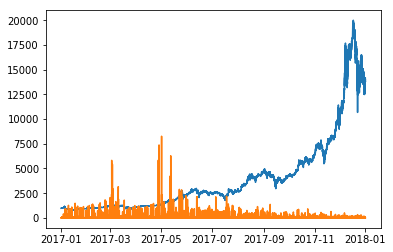

In [30]:
plot.plot(train2)

In [54]:
train2['Close_Log'] = np.log(train2.Close)

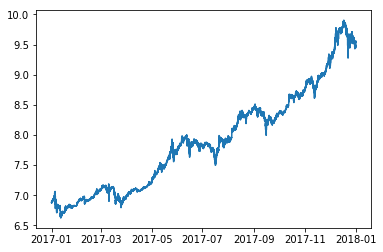

In [55]:
plot.plot(train2.Close_Log)

In [57]:
train2['Diff_Log'] = train2.Close_Log - train2.Close_Log.shift()

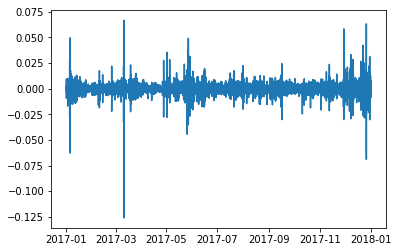

In [58]:
plot.plot(train2.Diff_Log)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


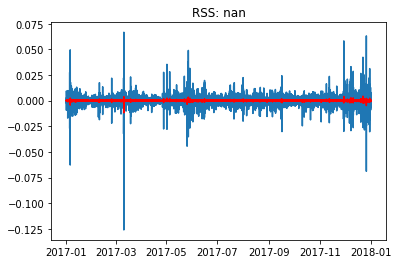

In [63]:

model = ARIMA(train2.Close_Log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(train2.Diff_Log)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-train2.Diff_Log)**2))
plot.show()

Printing Predicted vs Expected Values...


predicted = 12818.711179,   expected = 12741.530000,   error = 0.605745  %
predicted = 12736.177735,   expected = 12699.000000,   error = 0.292761  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12693.408021,   expected = 12791.520000,   error = 0.767008  %
predicted = 12796.586720,   expected = 12791.260000,   error = 0.041643  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12794.523096,   expected = 12791.320000,   error = 0.025041  %
predicted = 12791.371310,   expected = 12821.380000,   error = 0.234052  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12823.543606,   expected = 12791.340000,   error = 0.251761  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12790.340413,   expected = 12803.010000,   error = 0.098958  %
predicted = 12802.839684,   expected = 12837.980000,   error = 0.273722  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12840.892396,   expected = 12821.180000,   error = 0.153749  %
predicted = 12821.276536,   expected = 12821.190000,   error = 0.000675  %
predicted = 12820.664056,   expected = 12821.190000,   error = 0.004102  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12821.246673,   expected = 12870.000000,   error = 0.378814  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12873.477093,   expected = 12869.990000,   error = 0.027095  %
predicted = 12871.744116,   expected = 12870.000000,   error = 0.013552  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12870.056975,   expected = 12869.990000,   error = 0.000520  %
predicted = 12870.046271,   expected = 12870.000000,   error = 0.000360  %
predicted = 12870.056975,   expected = 12869.990000,   error = 0.000520  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12870.046271,   expected = 12885.500000,   error = 0.119931  %
predicted = 12886.641758,   expected = 12885.510000,   error = 0.008783  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12886.106315,   expected = 12896.670000,   error = 0.081910  %
predicted = 12897.507966,   expected = 12897.050000,   error = 0.003551  %
predicted = 12897.521075,   expected = 12910.200000,   error = 0.098209  %
predicted = 12911.190220,   expected = 12910.180000,   error = 0.007825  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12910.692348,   expected = 12892.550000,   error = 0.140720  %
predicted = 12891.374020,   expected = 12910.060000,   error = 0.144740  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12910.729634,   expected = 12910.210000,   error = 0.004025  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12910.885812,   expected = 12941.840000,   error = 0.239179  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12944.117131,   expected = 12941.840000,   error = 0.017595  %
predicted = 12942.996875,   expected = 12942.000000,   error = 0.007703  %
predicted = 12942.068251,   expected = 12974.840000,   error = 0.252579  %
predicted = 12977.202504,   expected = 12948.890000,   error = 0.218648  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12948.273964,   expected = 12949.210000,   error = 0.007229  %
predicted = 12948.389207,   expected = 12949.210000,   error = 0.006339  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12949.278218,   expected = 12948.120000,   error = 0.008945  %
predicted = 12948.100882,   expected = 12947.810000,   error = 0.002247  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12947.807569,   expected = 12908.600000,   error = 0.303732  %
predicted = 12905.908780,   expected = 12967.850000,   error = 0.477652  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12970.693337,   expected = 12971.000000,   error = 0.002364  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12973.340541,   expected = 13000.000000,   error = 0.205073  %
predicted = 13002.196972,   expected = 13039.240000,   error = 0.284089  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13043.057448,   expected = 13044.750000,   error = 0.012975  %
predicted = 13046.558900,   expected = 13049.110000,   error = 0.019550  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13049.664139,   expected = 13049.110000,   error = 0.004247  %
predicted = 13049.319205,   expected = 12929.100000,   error = 0.929834  %
predicted = 12920.808117,   expected = 12929.340000,   error = 0.065989  %
predicted = 12925.265187,   expected = 12929.330000,   error = 0.031439  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12929.394620,   expected = 12901.340000,   error = 0.217455  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12899.441879,   expected = 12871.700000,   error = 0.215526  %
predicted = 12868.718145,   expected = 12886.260000,   error = 0.136128  %
predicted = 12886.305859,   expected = 12885.870000,   error = 0.003382  %
predicted = 12886.405408,   expected = 12875.680000,   error = 0.083300  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12875.010993,   expected = 12856.410000,   error = 0.144683  %
predicted = 12854.767158,   expected = 12856.410000,   error = 0.012778  %
predicted = 12855.797817,   expected = 12856.410000,   error = 0.004762  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12856.466537,   expected = 12855.560000,   error = 0.007052  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12855.557105,   expected = 12855.560000,   error = 0.000023  %
predicted = 12855.587012,   expected = 12872.540000,   error = 0.131699  %
predicted = 12873.784640,   expected = 12828.220000,   error = 0.355191  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12825.771590,   expected = 12828.360000,   error = 0.020177  %
predicted = 12826.889658,   expected = 12828.350000,   error = 0.011384  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12828.410528,   expected = 12828.350000,   error = 0.000472  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12828.406018,   expected = 12728.130000,   error = 0.787830  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12721.209105,   expected = 12712.630000,   error = 0.067485  %
predicted = 12708.140997,   expected = 12756.350000,   error = 0.377922  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12758.928633,   expected = 12817.780000,   error = 0.459139  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12823.670206,   expected = 12832.500000,   error = 0.068808  %
predicted = 12835.725614,   expected = 12832.210000,   error = 0.027397  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12832.757095,   expected = 12832.210000,   error = 0.004263  %
predicted = 12832.256327,   expected = 12863.900000,   error = 0.245988  %
predicted = 12866.175649,   expected = 12832.900000,   error = 0.259300  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12831.889524,   expected = 12864.100000,   error = 0.250390  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12865.263712,   expected = 12878.880000,   error = 0.105726  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12881.056022,   expected = 12910.820000,   error = 0.230535  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12913.627779,   expected = 12902.490000,   error = 0.086323  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12903.073625,   expected = 12902.490000,   error = 0.004523  %
predicted = 12902.257840,   expected = 12910.700000,   error = 0.065389  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12911.331125,   expected = 12910.700000,   error = 0.004888  %
predicted = 12911.041867,   expected = 12882.230000,   error = 0.223656  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12880.298360,   expected = 12868.980000,   error = 0.087951  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12867.124918,   expected = 12868.980000,   error = 0.014415  %
predicted = 12868.577076,   expected = 12868.980000,   error = 0.003131  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12869.036612,   expected = 12864.480000,   error = 0.035420  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12864.221984,   expected = 12800.000000,   error = 0.501734  %
predicted = 12795.404297,   expected = 12758.560000,   error = 0.288781  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12753.498887,   expected = 12841.680000,   error = 0.686679  %
predicted = 12846.124089,   expected = 12921.300000,   error = 0.581798  %
predicted = 12929.853437,   expected = 12924.880000,   error = 0.038480  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12927.955266,   expected = 12963.010000,   error = 0.270421  %
predicted = 12965.863329,   expected = 12963.030000,   error = 0.021857  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12964.412172,   expected = 12963.030000,   error = 0.010662  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12963.087879,   expected = 12957.060000,   error = 0.046522  %
predicted = 12956.699611,   expected = 12926.610000,   error = 0.232773  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12924.333098,   expected = 12904.490000,   error = 0.153769  %
predicted = 12901.948544,   expected = 12800.010000,   error = 0.796394  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12792.027918,   expected = 12756.340000,   error = 0.279766  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12749.750250,   expected = 12734.000000,   error = 0.123687  %
predicted = 12730.984082,   expected = 12633.720000,   error = 0.769877  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12626.016322,   expected = 12673.760000,   error = 0.376713  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12673.143917,   expected = 12723.160000,   error = 0.393111  %
predicted = 12728.077242,   expected = 12775.620000,   error = 0.372137  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12781.081380,   expected = 12809.510000,   error = 0.221934  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12813.771741,   expected = 12801.950000,   error = 0.092343  %
predicted = 12802.653696,   expected = 12776.580000,   error = 0.204074  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12774.599967,   expected = 12733.990000,   error = 0.318910  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12730.192785,   expected = 12672.440000,   error = 0.455735  %
predicted = 12666.728286,   expected = 12658.360000,   error = 0.066109  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12655.301875,   expected = 12592.000000,   error = 0.502715  %
predicted = 12586.934007,   expected = 12594.800000,   error = 0.062454  %
predicted = 12592.752577,   expected = 12663.540000,   error = 0.558986  %
predicted = 12668.521907,   expected = 12736.690000,   error = 0.535210  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12744.293385,   expected = 12736.700000,   error = 0.059618  %
predicted = 12739.301570,   expected = 12736.700000,   error = 0.020426  %
predicted = 12736.756140,   expected = 12699.990000,   error = 0.289497  %
predicted = 12697.477229,   expected = 12699.990000,   error = 0.019786  %
predicted = 12698.774045,   expected = 12695.180000,   error = 0.028310  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12694.898567,   expected = 12643.390000,   error = 0.407395  %
predicted = 12639.658062,   expected = 12755.700000,   error = 0.909726  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12761.848635,   expected = 12664.990000,   error = 0.764775  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12662.611131,   expected = 12644.370000,   error = 0.144263  %
predicted = 12639.852198,   expected = 12709.720000,   error = 0.549719  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12713.642460,   expected = 12704.300000,   error = 0.073538  %
predicted = 12706.247398,   expected = 12704.030000,   error = 0.017454  %
predicted = 12703.878826,   expected = 12704.030000,   error = 0.001190  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12704.076239,   expected = 12704.030000,   error = 0.000364  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12704.085601,   expected = 12709.520000,   error = 0.042758  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12709.959843,   expected = 12709.450000,   error = 0.004012  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12709.691135,   expected = 12703.840000,   error = 0.046058  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12703.500750,   expected = 12680.110000,   error = 0.184468  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12678.312698,   expected = 12703.870000,   error = 0.201177  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12704.765980,   expected = 12726.320000,   error = 0.169366  %
predicted = 12728.774075,   expected = 12739.820000,   error = 0.086704  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12741.600881,   expected = 12758.900000,   error = 0.135585  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12760.761123,   expected = 12733.010000,   error = 0.217946  %
predicted = 12731.916892,   expected = 12708.260000,   error = 0.186154  %
predicted = 12705.690918,   expected = 12683.500000,   error = 0.174959  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12680.969275,   expected = 12632.220000,   error = 0.385912  %
predicted = 12627.840330,   expected = 12632.220000,   error = 0.034671  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12630.500650,   expected = 12662.840000,   error = 0.255388  %
predicted = 12665.040925,   expected = 12677.500000,   error = 0.098277  %
predicted = 12679.646161,   expected = 12676.950000,   error = 0.021268  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12677.475435,   expected = 12677.010000,   error = 0.003671  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12677.050567,   expected = 12677.010000,   error = 0.000320  %
predicted = 12677.067514,   expected = 12677.010000,   error = 0.000454  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12677.065434,   expected = 12720.130000,   error = 0.338554  %
predicted = 12723.208813,   expected = 12720.130000,   error = 0.024204  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12721.683127,   expected = 12722.930000,   error = 0.009800  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12723.181686,   expected = 12739.630000,   error = 0.129111  %
predicted = 12740.952553,   expected = 12738.190000,   error = 0.021687  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12738.724295,   expected = 12748.740000,   error = 0.078562  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12749.484543,   expected = 12748.740000,   error = 0.005840  %
predicted = 12749.161772,   expected = 12767.620000,   error = 0.144571  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12768.998284,   expected = 12763.870000,   error = 0.040178  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12764.318420,   expected = 12700.000000,   error = 0.506444  %
predicted = 12695.468577,   expected = 12650.000000,   error = 0.359435  %
predicted = 12644.364063,   expected = 12650.000000,   error = 0.044553  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12648.325870,   expected = 12633.010000,   error = 0.121237  %
predicted = 12631.876734,   expected = 12612.110000,   error = 0.156728  %
predicted = 12610.115828,   expected = 12612.460000,   error = 0.018586  %
predicted = 12611.815672,   expected = 12612.460000,   error = 0.005109  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12612.527172,   expected = 12572.000000,   error = 0.322361  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12569.227443,   expected = 12585.470000,   error = 0.129058  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12585.066512,   expected = 12627.170000,   error = 0.333436  %
predicted = 12630.617996,   expected = 12689.290000,   error = 0.462374  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12695.161397,   expected = 12665.200000,   error = 0.236565  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12665.724145,   expected = 12673.480000,   error = 0.061198  %
predicted = 12673.280700,   expected = 12700.000000,   error = 0.210388  %
predicted = 12702.201812,   expected = 12713.920000,   error = 0.092168  %
predicted = 12715.871683,   expected = 12681.350000,   error = 0.272224  %
predicted = 12679.609729,   expected = 12678.520000,   error = 0.008595  %
predicted = 12677.250787,   expected = 12673.530000,   error = 0.029359  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12673.138168,   expected = 12678.520000,   error = 0.042448  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12678.751926,   expected = 12678.520000,   error = 0.001829  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12678.748349,   expected = 12712.790000,   error = 0.267775  %
predicted = 12715.248162,   expected = 12712.790000,   error = 0.019336  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12714.034590,   expected = 12712.650000,   error = 0.010891  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12712.695847,   expected = 12712.450000,   error = 0.001934  %
predicted = 12712.486795,   expected = 12711.860000,   error = 0.004931  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12711.867412,   expected = 12720.150000,   error = 0.065114  %
predicted = 12720.765776,   expected = 12757.490000,   error = 0.287864  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12760.452227,   expected = 12757.490000,   error = 0.023220  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12758.841498,   expected = 12757.490000,   error = 0.010594  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12757.545920,   expected = 12753.530000,   error = 0.031489  %
predicted = 12753.308720,   expected = 12725.330000,   error = 0.219866  %
predicted = 12723.277053,   expected = 12720.270000,   error = 0.023640  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12718.996108,   expected = 12728.960000,   error = 0.078277  %
predicted = 12729.448941,   expected = 12723.900000,   error = 0.043610  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12723.902582,   expected = 12723.330000,   error = 0.004500  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12723.170561,   expected = 12720.010000,   error = 0.024847  %
predicted = 12719.813562,   expected = 12720.010000,   error = 0.001544  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12719.950692,   expected = 12764.030000,   error = 0.345340  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12767.173299,   expected = 12780.610000,   error = 0.105133  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12783.357365,   expected = 12818.390000,   error = 0.273300  %
predicted = 12821.672228,   expected = 12822.150000,   error = 0.003726  %
predicted = 12823.781106,   expected = 12826.660000,   error = 0.022445  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12827.162514,   expected = 12870.200000,   error = 0.334396  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12873.467384,   expected = 12847.910000,   error = 0.198923  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12847.916048,   expected = 12840.390000,   error = 0.058612  %
predicted = 12839.148954,   expected = 12824.840000,   error = 0.111572  %
predicted = 12823.548230,   expected = 12809.250000,   error = 0.111624  %
predicted = 12807.677679,   expected = 12792.990000,   error = 0.114810  %
predicted = 12791.369344,   expected = 12720.000000,   error = 0.561080  %
predicted = 12714.401120,   expected = 12719.990000,   error = 0.043938  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12717.522737,   expected = 12769.880000,   error = 0.410006  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12773.436084,   expected = 12791.300000,   error = 0.139657  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12794.591889,   expected = 12813.710000,   error = 0.149200  %
predicted = 12816.081030,   expected = 12840.390000,   error = 0.189316  %
predicted = 12843.095644,   expected = 12847.910000,   error = 0.037472  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12849.419145,   expected = 12847.900000,   error = 0.011824  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12848.216373,   expected = 12769.470000,   error = 0.616677  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12764.051439,   expected = 12805.370000,   error = 0.322666  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12805.226777,   expected = 12836.510000,   error = 0.243705  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12839.997677,   expected = 12847.920000,   error = 0.061662  %
predicted = 12849.856469,   expected = 12835.070000,   error = 0.115204  %
predicted = 12834.621986,   expected = 12817.540000,   error = 0.133270  %
predicted = 12815.925701,   expected = 12801.720000,   error = 0.110967  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12800.063438,   expected = 12850.000000,   error = 0.388611  %
predicted = 12852.894074,   expected = 12831.470000,   error = 0.166965  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12831.902367,   expected = 12849.860000,   error = 0.139750  %
predicted = 12850.562724,   expected = 12859.980000,   error = 0.073229  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12861.383132,   expected = 12907.800000,   error = 0.359603  %
predicted = 12911.563369,   expected = 12947.550000,   error = 0.277942  %
predicted = 12952.059728,   expected = 12970.010000,   error = 0.138398  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12973.023034,   expected = 12976.990000,   error = 0.030569  %
predicted = 12978.315321,   expected = 12960.490000,   error = 0.137536  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12959.634039,   expected = 12995.790000,   error = 0.278213  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12997.749867,   expected = 12982.100000,   error = 0.120550  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12982.422443,   expected = 12995.890000,   error = 0.103629  %
predicted = 12996.438891,   expected = 12995.720000,   error = 0.005532  %
predicted = 12996.243459,   expected = 12995.720000,   error = 0.004028  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12995.771479,   expected = 12995.710000,   error = 0.000473  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12995.766668,   expected = 12956.490000,   error = 0.303143  %
predicted = 12953.805201,   expected = 12910.000000,   error = 0.339312  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12905.456300,   expected = 12910.000000,   error = 0.035195  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12908.449345,   expected = 12894.230000,   error = 0.110277  %
predicted = 12893.183173,   expected = 12871.000000,   error = 0.172350  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12868.886482,   expected = 12871.090000,   error = 0.017120  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12870.348834,   expected = 12883.700000,   error = 0.103628  %
predicted = 12884.643307,   expected = 12883.700000,   error = 0.007322  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12884.193762,   expected = 12894.220000,   error = 0.077758  %
predicted = 12895.013751,   expected = 12986.970000,   error = 0.708065  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12993.914854,   expected = 12986.970000,   error = 0.053476  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12990.252311,   expected = 12970.110000,   error = 0.155298  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12968.987330,   expected = 12995.150000,   error = 0.201326  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12996.377922,   expected = 12973.790000,   error = 0.174104  %
predicted = 12973.219459,   expected = 12987.050000,   error = 0.106495  %
predicted = 12987.296267,   expected = 12987.030000,   error = 0.002050  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12987.545452,   expected = 13034.140000,   error = 0.357481  %
predicted = 13037.501969,   expected = 13056.640000,   error = 0.146577  %
predicted = 13059.912762,   expected = 13040.000000,   error = 0.152705  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13039.672161,   expected = 13040.100000,   error = 0.003281  %
predicted = 13039.588677,   expected = 13040.120000,   error = 0.004075  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13040.182502,   expected = 13068.680000,   error = 0.218060  %
predicted = 13070.740738,   expected = 13068.680000,   error = 0.015769  %
predicted = 13069.728126,   expected = 13050.200000,   error = 0.149639  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13048.964631,   expected = 13050.200000,   error = 0.009466  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13049.618160,   expected = 13032.190000,   error = 0.133732  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13030.987388,   expected = 13020.630000,   error = 0.079546  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13019.255687,   expected = 13020.630000,   error = 0.010555  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13020.287330,   expected = 13020.530000,   error = 0.001864  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13020.580514,   expected = 13050.500000,   error = 0.229259  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13052.655452,   expected = 13064.750000,   error = 0.092574  %
predicted = 13066.846675,   expected = 13068.680000,   error = 0.014028  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13069.507039,   expected = 13075.100000,   error = 0.042776  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13075.743752,   expected = 13075.160000,   error = 0.004465  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13075.444465,   expected = 13085.980000,   error = 0.080510  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13086.798028,   expected = 13075.000000,   error = 0.090233  %
predicted = 13074.663879,   expected = 13051.280000,   error = 0.179169  %
predicted = 13049.298881,   expected = 13051.160000,   error = 0.014260  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13050.388575,   expected = 13066.910000,   error = 0.126437  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13068.067293,   expected = 13085.980000,   error = 0.136885  %
predicted = 13087.921053,   expected = 13086.000000,   error = 0.014680  %
predicted = 13086.720227,   expected = 13077.440000,   error = 0.070964  %
predicted = 13076.899312,   expected = 13015.200000,   error = 0.474056  %
predicted = 13010.615044,   expected = 13009.150000,   error = 0.011262  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13006.634938,   expected = 13015.600000,   error = 0.068879  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13015.899768,   expected = 13024.310000,   error = 0.064573  %
predicted = 13025.201304,   expected = 13024.140000,   error = 0.008149  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13024.487325,   expected = 13023.900000,   error = 0.004510  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13023.934841,   expected = 13025.320000,   error = 0.010634  %
predicted = 13025.468686,   expected = 12960.160000,   error = 0.503919  %
predicted = 12955.715044,   expected = 12960.740000,   error = 0.038771  %
predicted = 12958.587307,   expected = 12971.910000,   error = 0.102704  %
predicted = 12972.769928,   expected = 12971.910000,   error = 0.006629  %
predicted = 12972.354108,   expected = 12983.990000,   error = 0.089617  %
predicted = 12984.893690,   expected = 12989.200000,   error = 0.033153  %
predicted = 12990.040880,   expected = 12998.090000,   error = 0.061925  %
predicted = 12998.950741,   expected = 13001.740000,   error = 0.021453  %
predicted = 13002.361050,   expected = 12998.090000,   error = 0.032859  %
predicted = 12998.018151,   expected = 12971.800000,   error = 0.202117  %
predicted = 12969.891984,   expected = 12971.800000,   error = 0.014709  %
predicted = 12970.947965,   expected = 12971.800000,   error = 0.006568  %
predicted = 12971.857215,

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12971.857215,   expected = 12971.790000,   error = 0.000518  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12971.846515,   expected = 12990.000000,   error = 0.139750  %
predicted = 12991.333222,   expected = 12998.080000,   error = 0.051906  %
predicted = 12999.334764,   expected = 13000.000000,   error = 0.005117  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13000.471738,   expected = 13041.240000,   error = 0.312610  %
predicted = 13044.257390,   expected = 13006.670000,   error = 0.288985  %
predicted = 13005.736305,   expected = 13006.670000,   error = 0.007179  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13005.532126,   expected = 12996.090000,   error = 0.072654  %
predicted = 12995.406834,   expected = 12996.090000,   error = 0.005257  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12995.781175,   expected = 12996.090000,   error = 0.002376  %
predicted = 12996.147363,   expected = 12996.090000,   error = 0.000441  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12996.147363,   expected = 12996.120000,   error = 0.000211  %
predicted = 12996.179464,   expected = 13017.620000,   error = 0.164704  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13019.185376,   expected = 13081.700000,   error = 0.477878  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13087.006180,   expected = 13116.490000,   error = 0.224784  %
predicted = 13121.219144,   expected = 13132.410000,   error = 0.085216  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13134.792088,   expected = 13150.000000,   error = 0.115650  %
predicted = 13151.843813,   expected = 13168.340000,   error = 0.125272  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13170.294623,   expected = 13197.210000,   error = 0.203947  %
predicted = 13199.930515,   expected = 13197.210000,   error = 0.020614  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13198.269747,   expected = 13197.210000,   error = 0.008030  %
predicted = 13197.268593,   expected = 13197.220000,   error = 0.000368  %
predicted = 13197.279293,   expected = 13210.350000,   error = 0.098943  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13211.329257,   expected = 13210.350000,   error = 0.007413  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13210.863713,   expected = 13213.200000,   error = 0.017681  %
predicted = 13213.458354,   expected = 13233.410000,   error = 0.150767  %
predicted = 13234.984566,   expected = 13243.960000,   error = 0.067770  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13245.459429,   expected = 13244.140000,   error = 0.009962  %
predicted = 13244.577085,   expected = 13225.550000,   error = 0.143866  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13224.313731,   expected = 13244.140000,   error = 0.149698  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13244.857643,   expected = 13255.690000,   error = 0.081719  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13257.203363,   expected = 13293.410000,   error = 0.272365  %
predicted = 13296.517025,   expected = 13257.680000,   error = 0.292940  %
predicted = 13256.544628,   expected = 13239.950000,   error = 0.125338  %
predicted = 13237.533826,   expected = 13213.190000,   error = 0.184239  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13210.763807,   expected = 13213.200000,   error = 0.018438  %
predicted = 13212.333421,   expected = 13209.570000,   error = 0.020920  %
predicted = 13209.374772,   expected = 13210.360000,   error = 0.007458  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13210.348281,   expected = 13084.900000,   error = 0.958726  %
predicted = 13076.242273,   expected = 13005.030000,   error = 0.547575  %
predicted = 12995.212099,   expected = 13005.030000,   error = 0.075493  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13002.330266,   expected = 13057.180000,   error = 0.420073  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13060.901131,   expected = 13034.350000,   error = 0.203701  %
predicted = 13034.613984,   expected = 13052.480000,   error = 0.136878  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13053.018683,   expected = 13010.320000,   error = 0.328191  %
predicted = 13008.053806,   expected = 13011.710000,   error = 0.028099  %
predicted = 13010.407654,   expected = 13050.400000,   error = 0.306445  %
predicted = 13053.221727,   expected = 13131.860000,   error = 0.598836  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13138.997210,   expected = 13070.000000,   error = 0.527905  %
predicted = 13068.547230,   expected = 12968.000000,   error = 0.775349  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12958.823016,   expected = 13052.860000,   error = 0.720432  %
predicted = 13055.352483,   expected = 13075.240000,   error = 0.152101  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13079.810180,   expected = 13042.730000,   error = 0.284298  %
predicted = 13041.283343,   expected = 13009.910000,   error = 0.241150  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13006.554527,   expected = 12998.540000,   error = 0.061657  %
predicted = 12996.671980,   expected = 12972.390000,   error = 0.187182  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12970.225787,   expected = 12930.090000,   error = 0.310406  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12926.290205,   expected = 12930.100000,   error = 0.029465  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12928.701374,   expected = 12949.990000,   error = 0.164391  %
predicted = 12951.442388,   expected = 12949.990000,   error = 0.011215  %
predicted = 12950.733448,   expected = 12949.990000,   error = 0.005741  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12950.047081,   expected = 12948.990000,   error = 0.008163  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12948.977002,   expected = 12949.000000,   error = 0.000178  %
predicted = 12949.023297,   expected = 12953.000000,   error = 0.030701  %
predicted = 12953.337795,   expected = 12960.100000,   error = 0.052177  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12960.792856,   expected = 12990.100000,   error = 0.225611  %
predicted = 12992.507731,   expected = 13011.370000,   error = 0.144968  %
predicted = 13013.956863,   expected = 13068.130000,   error = 0.414544  %
predicted = 13072.912764,   expected = 13000.000000,   error = 0.560867  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12997.248155,   expected = 12964.500000,   error = 0.252599  %
predicted = 12959.737880,   expected = 12994.980000,   error = 0.271198  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12995.951191,   expected = 12925.900000,   error = 0.541944  %
predicted = 12922.177335,   expected = 12903.000000,   error = 0.148627  %
predicted = 12899.083849,   expected = 12888.600000,   error = 0.081342  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12886.860577,   expected = 12925.900000,   error = 0.302025  %
predicted = 12928.076723,   expected = 12925.900000,   error = 0.016840  %
predicted = 12927.244538,   expected = 12975.500000,   error = 0.371897  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12979.039390,   expected = 12975.500000,   error = 0.027277  %
predicted = 12977.270798,   expected = 12975.500000,   error = 0.013647  %
predicted = 12975.557237,   expected = 13012.130000,   error = 0.281067  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13014.757649,   expected = 13005.390000,   error = 0.072029  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13006.239467,   expected = 12987.510000,   error = 0.144211  %
predicted = 12986.083603,   expected = 12987.510000,   error = 0.010983  %
predicted = 12986.951333,   expected = 12970.140000,   error = 0.129616  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12968.981139,   expected = 12995.770000,   error = 0.206135  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12997.025093,   expected = 12978.510000,   error = 0.142660  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12978.242332,   expected = 12970.150000,   error = 0.062392  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12969.027476,   expected = 12970.000000,   error = 0.007498  %
predicted = 12969.758558,   expected = 12978.500000,   error = 0.067353  %
predicted = 12979.147755,   expected = 12978.520000,   error = 0.004837  %
predicted = 12978.871814,   expected = 12978.520000,   error = 0.002711  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12978.577944,   expected = 13016.990000,   error = 0.295092  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13019.746749,   expected = 13016.990000,   error = 0.021178  %
predicted = 13018.375860,   expected = 13016.990000,   error = 0.010647  %
predicted = 13017.047489,   expected = 13030.680000,   error = 0.104619  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13031.697155,   expected = 13050.060000,   error = 0.140711  %
predicted = 13051.949445,   expected = 13050.060000,   error = 0.014478  %
predicted = 13050.786367,   expected = 13050.070000,   error = 0.005489  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13050.128392,   expected = 13050.070000,   error = 0.000447  %
predicted = 13050.128036,   expected = 13025.450000,   error = 0.189460  %
predicted = 13023.784520,   expected = 13020.020000,   error = 0.028913  %
predicted = 13018.849579,   expected = 12994.990000,   error = 0.183606  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12993.108846,   expected = 12978.510000,   error = 0.112485  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12976.552459,   expected = 12978.510000,   error = 0.015083  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12977.999391,   expected = 12978.510000,   error = 0.003934  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12978.567252,   expected = 12978.500000,   error = 0.000518  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12978.556551,   expected = 12984.660000,   error = 0.047005  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12985.148615,   expected = 13000.950000,   error = 0.121540  %
predicted = 13002.362152,   expected = 12994.390000,   error = 0.061351  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 12994.549629,   expected = 13052.200000,   error = 0.441691  %
predicted = 13056.089940,   expected = 13038.840000,   error = 0.132297  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13039.958314,   expected = 13038.870000,   error = 0.008347  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13038.469228,   expected = 13039.010000,   error = 0.004147  %
predicted = 13039.078463,   expected = 13053.080000,   error = 0.107266  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13054.128713,   expected = 13065.400000,   error = 0.086268  %
predicted = 13066.807226,   expected = 13075.000000,   error = 0.062660  %
predicted = 13076.156019,   expected = 13118.490000,   error = 0.322705  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13121.932522,   expected = 13132.900000,   error = 0.083511  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13135.472591,   expected = 13149.970000,   error = 0.110247  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13151.723033,   expected = 13196.390000,   error = 0.338479  %
predicted = 13200.298400,   expected = 13196.410000,   error = 0.029466  %
predicted = 13198.074232,   expected = 13180.210000,   error = 0.135538  %
predicted = 13179.134939,   expected = 13150.630000,   error = 0.216757  %
predicted = 13148.061266,   expected = 13140.700000,   error = 0.056019  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13139.044514,   expected = 13125.680000,   error = 0.101820  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13124.344438,   expected = 13125.800000,   error = 0.011089  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13125.348752,   expected = 13105.900000,   error = 0.148397  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13104.569004,   expected = 13084.640000,   error = 0.152308  %
predicted = 13082.524829,   expected = 13084.690000,   error = 0.016547  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13084.018633,   expected = 13084.690000,   error = 0.005131  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13084.749623,   expected = 13098.490000,   error = 0.104900  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13099.515452,   expected = 13099.140000,   error = 0.002866  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13099.719858,   expected = 13099.000000,   error = 0.005496  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13099.070599,   expected = 13085.070000,   error = 0.106997  %
predicted = 13084.147599,   expected = 13085.050000,   error = 0.006896  %
predicted = 13084.626239,   expected = 13076.240000,   error = 0.064133  %
predicted = 13075.680090,   expected = 13195.650000,   error = 0.909163  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13203.807878,   expected = 13169.860000,   error = 0.257769  %
predicted = 13172.244250,   expected = 13140.170000,   error = 0.244093  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13137.265045,   expected = 13140.180000,   error = 0.022184  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13139.216506,   expected = 13160.990000,   error = 0.165440  %
predicted = 13162.507547,   expected = 13160.970000,   error = 0.011683  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13161.744948,   expected = 13160.000000,   error = 0.013259  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13159.989733,   expected = 13160.000000,   error = 0.000078  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13160.024924,   expected = 13160.960000,   error = 0.007105  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13161.085612,   expected = 13160.960000,   error = 0.000954  %
predicted = 13161.051463,   expected = 13158.000000,   error = 0.023191  %
predicted = 13157.851046,   expected = 13199.420000,   error = 0.314930  %
predicted = 13202.282246,   expected = 13199.990000,   error = 0.017366  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13201.518800,   expected = 13175.390000,   error = 0.198315  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13173.746747,   expected = 13175.590000,   error = 0.013990  %
predicted = 13174.815376,   expected = 13254.040000,   error = 0.597739  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13259.618029,   expected = 13293.420000,   error = 0.254276  %
predicted = 13298.962129,   expected = 13293.400000,   error = 0.041841  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13294.816596,   expected = 13327.100000,   error = 0.242239  %
predicted = 13329.522784,   expected = 13344.480000,   error = 0.112085  %
predicted = 13346.922389,   expected = 13328.890000,   error = 0.135288  %
predicted = 13328.456389,   expected = 13297.430000,   error = 0.233326  %
predicted = 13294.752457,   expected = 13290.000000,   error = 0.035760  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13288.456832,   expected = 13254.030000,   error = 0.259746  %
predicted = 13251.317243,   expected = 13158.000000,   error = 0.709205  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13150.126812,   expected = 13157.960000,   error = 0.059532  %
predicted = 13154.718886,   expected = 13157.890000,   error = 0.024100  %
predicted = 13157.942062,   expected = 13223.240000,   error = 0.493812  %
predicted = 13227.887915,   expected = 13227.370000,   error = 0.003915  %
predicted = 13229.976606,   expected = 13227.380000,   error = 0.019631  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13227.581808,   expected = 13227.380000,   error = 0.001526  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13227.439116,   expected = 13243.930000,   error = 0.124517  %
predicted = 13245.149424,   expected = 13243.930000,   error = 0.009207  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13244.559523,   expected = 13247.930000,   error = 0.025442  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13248.269251,   expected = 13247.930000,   error = 0.002561  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13248.126753,   expected = 13247.920000,   error = 0.001561  %
predicted = 13247.978197,   expected = 13247.920000,   error = 0.000439  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13247.978553,   expected = 13250.000000,   error = 0.015256  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13250.204683,   expected = 13250.010000,   error = 0.001469  %
predicted = 13250.141290,   expected = 13288.000000,   error = 0.284909  %
predicted = 13290.725770,   expected = 13289.000000,   error = 0.012986  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13290.440355,   expected = 13289.250000,   error = 0.008957  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13289.361131,   expected = 13289.000000,   error = 0.002718  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13289.050245,   expected = 13289.000000,   error = 0.000378  %
predicted = 13289.050535,   expected = 13274.170000,   error = 0.112101  %
predicted = 13273.190445,   expected = 13274.170000,   error = 0.007379  %
predicted = 13273.718332,   expected = 13274.960000,   error = 0.009353  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13275.074425,   expected = 13216.300000,   error = 0.444712  %
predicted = 13212.284934,   expected = 13199.130000,   error = 0.099665  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13195.972330,   expected = 13192.710000,   error = 0.024728  %
predicted = 13191.727796,   expected = 13157.760000,   error = 0.258158  %
predicted = 13155.151907,   expected = 13166.150000,   error = 0.083533  %
predicted = 13165.592942,   expected = 13168.870000,   error = 0.024885  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13169.408340,   expected = 13157.490000,   error = 0.090582  %
predicted = 13156.844858,   expected = 13136.980000,   error = 0.151213  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13135.210723,   expected = 13145.550000,   error = 0.078652  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13145.502363,   expected = 13153.270000,   error = 0.059055  %
predicted = 13154.165103,   expected = 13157.470000,   error = 0.025118  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13158.088924,   expected = 13157.480000,   error = 0.004628  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13157.683793,   expected = 13169.150000,   error = 0.087069  %
predicted = 13170.026982,   expected = 13169.150000,   error = 0.006659  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13169.610737,   expected = 13169.160000,   error = 0.003423  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13169.219111,   expected = 13157.950000,   error = 0.085645  %
predicted = 13157.223443,   expected = 13150.400000,   error = 0.051888  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13149.543465,   expected = 13137.000000,   error = 0.095482  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13135.859822,   expected = 13149.880000,   error = 0.106618  %
predicted = 13150.379398,   expected = 13149.880000,   error = 0.003798  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13150.382357,   expected = 13157.950000,   error = 0.057514  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13158.574074,   expected = 13149.790000,   error = 0.066800  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13149.554628,   expected = 13149.790000,   error = 0.001790  %
predicted = 13149.567185,   expected = 13157.940000,   error = 0.063633  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13158.569680,   expected = 13157.940000,   error = 0.004786  %
predicted = 13158.279279,   expected = 13160.280000,   error = 0.015203  %
predicted = 13160.502357,   expected = 13195.410000,   error = 0.264544  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13198.014860,   expected = 13193.080000,   error = 0.037405  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13194.187300,   expected = 13192.700000,   error = 0.011274  %
predicted = 13192.651642,   expected = 13192.700000,   error = 0.000367  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13192.745459,   expected = 13214.250000,   error = 0.162738  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13215.820210,   expected = 13213.390000,   error = 0.018392  %
predicted = 13214.131594,   expected = 13213.000000,   error = 0.008564  %
predicted = 13213.001714,   expected = 13214.790000,   error = 0.013532  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13214.960698,   expected = 13292.780000,   error = 0.585425  %
predicted = 13298.383809,   expected = 13250.040000,   error = 0.364858  %
predicted = 13249.796226,   expected = 13293.420000,   error = 0.328161  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13295.046694,   expected = 13289.930000,   error = 0.038501  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13291.242642,   expected = 13283.810000,   error = 0.055953  %
predicted = 13283.320282,   expected = 13292.200000,   error = 0.066804  %
predicted = 13292.635934,   expected = 13300.000000,   error = 0.055369  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13300.895297,   expected = 13300.790000,   error = 0.000792  %
predicted = 13301.173594,   expected = 13293.460000,   error = 0.058025  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13293.033114,   expected = 13290.000000,   error = 0.022823  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13289.564238,   expected = 13300.000000,   error = 0.078464  %
predicted = 13300.640572,   expected = 13280.970000,   error = 0.148111  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13280.041573,   expected = 13321.990000,   error = 0.314881  %
predicted = 13324.269224,   expected = 13353.260000,   error = 0.217106  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13356.932698,   expected = 13400.000000,   error = 0.321398  %
predicted = 13404.423940,   expected = 13420.990000,   error = 0.123434  %
predicted = 13424.139339,   expected = 13470.090000,   error = 0.341131  %
predicted = 13474.324566,   expected = 13490.770000,   error = 0.121901  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13493.980593,   expected = 13496.510000,   error = 0.018741  %
predicted = 13497.687123,   expected = 13496.510000,   error = 0.008722  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13496.768516,   expected = 13524.960000,   error = 0.208440  %
predicted = 13527.016221,   expected = 13699.990000,   error = 1.262583  %
predicted = 13713.398644,   expected = 13714.000000,   error = 0.004385  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13721.129069,   expected = 13707.990000,   error = 0.095850  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13708.113807,   expected = 13750.000000,   error = 0.304627  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13752.803409,   expected = 13759.000000,   error = 0.045037  %
predicted = 13761.145465,   expected = 13820.420000,   error = 0.428891  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13825.109987,   expected = 13850.000000,   error = 0.179711  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13854.267689,   expected = 13873.580000,   error = 0.139202  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13876.321210,   expected = 13750.000000,   error = 0.918700  %
predicted = 13742.248403,   expected = 13731.990000,   error = 0.074704  %
predicted = 13726.553770,   expected = 13691.220000,   error = 0.258076  %
predicted = 13687.809003,   expected = 13803.520000,   error = 0.838272  %
predicted = 13810.068879,   expected = 13802.970000,   error = 0.051430  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13806.885021,   expected = 13803.210000,   error = 0.026624  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13803.270160,   expected = 13800.000000,   error = 0.023697  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13799.845678,   expected = 13776.700000,   error = 0.168006  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13775.020409,   expected = 13739.990000,   error = 0.254952  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13736.682134,   expected = 13748.100000,   error = 0.083050  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13747.464734,   expected = 13768.860000,   error = 0.155389  %
predicted = 13770.658378,   expected = 13800.000000,   error = 0.212620  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13802.965708,   expected = 13802.980000,   error = 0.000104  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13804.327059,   expected = 13889.400000,   error = 0.612503  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13895.642627,   expected = 13900.000000,   error = 0.031348  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13903.800840,   expected = 13900.000000,   error = 0.027344  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13900.428911,   expected = 13902.020000,   error = 0.011445  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13902.224507,   expected = 13899.990000,   error = 0.016076  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13899.980380,   expected = 13902.000000,   error = 0.014528  %
predicted = 13902.133737,   expected = 13901.990000,   error = 0.001034  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13902.121610,   expected = 14016.190000,   error = 0.813833  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14024.291045,   expected = 14026.550000,   error = 0.016105  %
predicted = 14031.301166,   expected = 14034.820000,   error = 0.025072  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14035.821476,   expected = 14099.950000,   error = 0.454814  %
predicted = 14104.876945,   expected = 14059.900000,   error = 0.319895  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14059.408681,   expected = 14028.740000,   error = 0.218613  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14025.246010,   expected = 14067.600000,   error = 0.301075  %
predicted = 14069.313932,   expected = 14016.190000,   error = 0.379018  %
predicted = 14013.996695,   expected = 14016.140000,   error = 0.015292  %
predicted = 14014.429358,   expected = 14017.260000,   error = 0.020194  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14017.400396,   expected = 14016.150000,   error = 0.008921  %
predicted = 14016.174532,   expected = 13924.000000,   error = 0.661983  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13917.592090,   expected = 13930.310000,   error = 0.091297  %
predicted = 13927.644638,   expected = 14020.000000,   error = 0.658740  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14026.587676,   expected = 14031.990000,   error = 0.038500  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14035.998342,   expected = 13985.730000,   error = 0.359426  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13982.969902,   expected = 14000.000000,   error = 0.121644  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13999.471405,   expected = 14000.000000,   error = 0.003776  %
predicted = 14000.555324,   expected = 13982.620000,   error = 0.128269  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13981.466666,   expected = 13943.910000,   error = 0.269341  %
predicted = 13940.668774,   expected = 13900.000000,   error = 0.292581  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13895.664527,   expected = 13900.000000,   error = 0.031190  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13898.552934,   expected = 13863.640000,   error = 0.251831  %
predicted = 13861.158669,   expected = 13861.990000,   error = 0.005997  %
predicted = 13860.686248,   expected = 13833.600000,   error = 0.195800  %
predicted = 13831.618795,   expected = 13859.990000,   error = 0.204699  %
predicted = 13860.924271,   expected = 13879.990000,   error = 0.137361  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13882.366725,   expected = 13879.990000,   error = 0.017123  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13880.742402,   expected = 13871.970000,   error = 0.063238  %
predicted = 13871.471004,   expected = 13870.970000,   error = 0.003612  %
predicted = 13870.686465,   expected = 13875.950000,   error = 0.037933  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13876.327295,   expected = 13770.610000,   error = 0.767702  %
predicted = 13763.492470,   expected = 13799.070000,   error = 0.257826  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13797.504653,   expected = 13799.000000,   error = 0.010837  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13800.039039,   expected = 13702.400000,   error = 0.712569  %
predicted = 13695.718818,   expected = 13725.690000,   error = 0.218358  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13724.063306,   expected = 13721.640000,   error = 0.017660  %
predicted = 13722.220885,   expected = 13787.270000,   error = 0.471806  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13791.799440,   expected = 13787.270000,   error = 0.032852  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13789.598826,   expected = 13828.910000,   error = 0.284268  %
predicted = 13831.892929,   expected = 13831.320000,   error = 0.004142  %
predicted = 13832.988896,   expected = 13872.610000,   error = 0.285607  %
predicted = 13875.651942,   expected = 13839.740000,   error = 0.259484  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13838.926083,   expected = 13900.000000,   error = 0.439381  %
predicted = 13903.153615,   expected = 13900.000000,   error = 0.022688  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13902.145831,   expected = 13902.000000,   error = 0.001049  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13902.202951,   expected = 13911.060000,   error = 0.063669  %
predicted = 13911.826469,   expected = 13931.870000,   error = 0.143868  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13933.704133,   expected = 13925.870000,   error = 0.056256  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13926.231084,   expected = 13883.810000,   error = 0.305544  %
predicted = 13880.727027,   expected = 13855.220000,   error = 0.184097  %
predicted = 13851.838367,   expected = 13899.830000,   error = 0.345268  %
predicted = 13902.033191,   expected = 13870.970000,   error = 0.223944  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13870.552145,   expected = 13858.330000,   error = 0.088193  %
predicted = 13856.515379,   expected = 13859.910000,   error = 0.024492  %
predicted = 13859.647656,   expected = 13850.820000,   error = 0.063734  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13850.300994,   expected = 13859.900000,   error = 0.069257  %
predicted = 13860.284969,   expected = 13855.520000,   error = 0.034390  %
predicted = 13855.589156,   expected = 13901.030000,   error = 0.326888  %
predicted = 13904.132493,   expected = 13908.070000,   error = 0.028311  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13910.198504,   expected = 13900.000000,   error = 0.073371  %
predicted = 13899.740848,   expected = 13900.000000,   error = 0.001864  %
predicted = 13899.784781,   expected = 13900.000000,   error = 0.001548  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13900.062921,   expected = 13912.080000,   error = 0.086379  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13912.988952,   expected = 13912.080000,   error = 0.006534  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13912.559657,   expected = 13943.910000,   error = 0.224832  %
predicted = 13946.203904,   expected = 13935.950000,   error = 0.073579  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13936.554226,   expected = 13879.890000,   error = 0.408247  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13875.764119,   expected = 13860.180000,   error = 0.112438  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13856.938640,   expected = 13804.410000,   error = 0.380521  %
predicted = 13799.900287,   expected = 13827.180000,   error = 0.197291  %
predicted = 13826.915325,   expected = 13852.400000,   error = 0.183973  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13855.016978,   expected = 13839.150000,   error = 0.114653  %
predicted = 13839.154834,   expected = 13831.010000,   error = 0.058888  %
predicted = 13830.046626,   expected = 13851.890000,   error = 0.157692  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13853.134455,   expected = 13850.200000,   error = 0.021187  %
predicted = 13850.864521,   expected = 13807.000000,   error = 0.317698  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13803.985333,   expected = 13870.250000,   error = 0.477747  %
predicted = 13873.256315,   expected = 13854.040000,   error = 0.138705  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13855.151646,   expected = 13899.820000,   error = 0.321359  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13902.531337,   expected = 13868.250000,   error = 0.247193  %
predicted = 13867.684339,   expected = 13900.010000,   error = 0.232559  %
predicted = 13901.207117,   expected = 13950.000000,   error = 0.349770  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13954.668486,   expected = 13948.990000,   error = 0.040709  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13950.709652,   expected = 13948.870000,   error = 0.013189  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13948.889998,   expected = 13948.600000,   error = 0.002079  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13948.640193,   expected = 13948.710000,   error = 0.000500  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13948.771608,   expected = 13930.330000,   error = 0.132385  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13929.111801,   expected = 13945.320000,   error = 0.116227  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13945.798420,   expected = 13945.330000,   error = 0.003359  %
predicted = 13945.911156,   expected = 13898.920000,   error = 0.338092  %
predicted = 13895.741942,   expected = 13899.990000,   error = 0.030562  %
predicted = 13898.530029,   expected = 13899.700000,   error = 0.008417  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13899.779526,   expected = 13900.000000,   error = 0.001586  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13900.073909,   expected = 13923.400000,   error = 0.167532  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13925.112087,   expected = 13921.720000,   error = 0.024365  %
predicted = 13922.473034,   expected = 13859.950000,   error = 0.451106  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13855.643583,   expected = 13850.000000,   error = 0.040748  %
predicted = 13847.243697,   expected = 13860.000000,   error = 0.092037  %
predicted = 13860.419482,   expected = 13859.990000,   error = 0.003099  %
predicted = 13860.396818,   expected = 13874.660000,   error = 0.102800  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13875.749418,   expected = 13880.330000,   error = 0.033001  %
predicted = 13881.295811,   expected = 13880.990000,   error = 0.002203  %
predicted = 13881.294491,   expected = 13912.450000,   error = 0.223940  %
predicted = 13914.739647,   expected = 13899.890000,   error = 0.106833  %
predicted = 13900.159339,   expected = 13884.750000,   error = 0.110980  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13883.321900,   expected = 13850.000000,   error = 0.240591  %
predicted = 13847.114233,   expected = 13839.160000,   error = 0.057476  %
predicted = 13837.268987,   expected = 13800.000000,   error = 0.270065  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13796.953886,   expected = 13825.530000,   error = 0.206691  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13826.029571,   expected = 13839.150000,   error = 0.094807  %
predicted = 13841.047948,   expected = 13839.150000,   error = 0.013714  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13839.682340,   expected = 13851.900000,   error = 0.088202  %
predicted = 13852.855149,   expected = 13808.900000,   error = 0.318310  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13806.397204,   expected = 13800.990000,   error = 0.039180  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13799.019852,   expected = 13752.070000,   error = 0.341402  %
predicted = 13748.444050,   expected = 13787.730000,   error = 0.284934  %
predicted = 13788.601721,   expected = 13850.000000,   error = 0.443309  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13855.666779,   expected = 13844.580000,   error = 0.080080  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13846.413807,   expected = 13851.860000,   error = 0.039317  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13852.245224,   expected = 13851.860000,   error = 0.002781  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13852.173623,   expected = 13851.870000,   error = 0.002192  %
predicted = 13851.933317,   expected = 13851.870000,   error = 0.000457  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13851.932962,   expected = 13851.870000,   error = 0.000455  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13851.932617,   expected = 13850.000000,   error = 0.013954  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13849.931777,   expected = 13844.580000,   error = 0.038656  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13844.199006,   expected = 13844.580000,   error = 0.002752  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13844.455784,   expected = 13816.180000,   error = 0.204657  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13814.257537,   expected = 13816.560000,   error = 0.016665  %
predicted = 13815.671041,   expected = 13816.550000,   error = 0.006362  %
predicted = 13816.624795,   expected = 13816.560000,   error = 0.000469  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13816.622751,   expected = 13825.090000,   error = 0.061246  %
predicted = 13825.749802,   expected = 13829.030000,   error = 0.023720  %
predicted = 13829.662397,   expected = 13833.190000,   error = 0.025501  %
predicted = 13833.679483,   expected = 13833.190000,   error = 0.003538  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13833.395918,   expected = 13844.570000,   error = 0.080711  %
predicted = 13845.429136,   expected = 13844.290000,   error = 0.008228  %
predicted = 13844.725411,   expected = 13780.730000,   error = 0.464383  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13776.346521,   expected = 13752.580000,   error = 0.172815  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13748.493786,   expected = 13750.280000,   error = 0.012990  %
predicted = 13749.212051,   expected = 13774.500000,   error = 0.183585  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13776.179097,   expected = 13799.500000,   error = 0.168998  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13802.150439,   expected = 13821.930000,   error = 0.143103  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13824.427323,   expected = 13818.290000,   error = 0.044414  %
predicted = 13818.871153,   expected = 13824.380000,   error = 0.039849  %
predicted = 13824.743224,   expected = 13850.000000,   error = 0.182359  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13852.067595,   expected = 13834.130000,   error = 0.129662  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13833.965342,   expected = 13900.000000,   error = 0.475069  %
predicted = 13904.134026,   expected = 13879.530000,   error = 0.177268  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13880.434588,   expected = 13849.190000,   error = 0.225606  %
predicted = 13846.429026,   expected = 13844.080000,   error = 0.016968  %
predicted = 13842.741072,   expected = 13849.150000,   error = 0.046277  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13849.391259,   expected = 13862.950000,   error = 0.097806  %
predicted = 13864.153690,   expected = 13870.180000,   error = 0.043448  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13871.224829,   expected = 13879.530000,   error = 0.059838  %
predicted = 13880.496638,   expected = 13900.000000,   error = 0.140312  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13901.819161,   expected = 13918.550000,   error = 0.120205  %
predicted = 13920.618937,   expected = 13918.560000,   error = 0.014793  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13919.263481,   expected = 13918.560000,   error = 0.005054  %
predicted = 13918.623373,   expected = 13918.560000,   error = 0.000455  %
predicted = 13918.623028,   expected = 13923.000000,   error = 0.031437  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13923.373778,   expected = 13939.910000,   error = 0.118625  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13941.310380,   expected = 13918.550000,   error = 0.163526  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13917.701912,   expected = 13900.000000,   error = 0.127352  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13898.031405,   expected = 13900.010000,   error = 0.014234  %
predicted = 13899.434784,   expected = 13895.370000,   error = 0.029253  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13895.108621,   expected = 13895.360000,   error = 0.001809  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13895.262305,   expected = 13895.310000,   error = 0.000343  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13895.369039,   expected = 13895.370000,   error = 0.000007  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13895.435358,   expected = 13870.180000,   error = 0.182084  %
predicted = 13868.483941,   expected = 13870.000000,   error = 0.010930  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13869.182852,   expected = 13888.900000,   error = 0.141963  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13890.280039,   expected = 13900.000000,   error = 0.069928  %
predicted = 13901.492230,   expected = 13903.820000,   error = 0.016742  %
predicted = 13904.533042,   expected = 13900.000000,   error = 0.032612  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13899.927274,   expected = 13844.080000,   error = 0.403402  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13840.107125,   expected = 13802.860000,   error = 0.269851  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13798.125524,   expected = 13774.100000,   error = 0.174425  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13770.736251,   expected = 13803.080000,   error = 0.234323  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13804.180535,   expected = 13821.500000,   error = 0.125308  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13823.853523,   expected = 13821.500000,   error = 0.017028  %
predicted = 13822.197525,   expected = 13821.500000,   error = 0.005047  %
predicted = 13821.562420,   expected = 13821.500000,   error = 0.000452  %
predicted = 13821.562420,   expected = 13856.560000,   error = 0.252570  %
predicted = 13859.079683,   expected = 13824.300000,   error = 0.251584  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13823.314282,   expected = 13835.320000,   error = 0.086776  %
predicted = 13835.042772,   expected = 13871.000000,   error = 0.259226  %
predicted = 13873.943922,   expected = 13871.000000,   error = 0.021224  %
predicted = 13872.293597,   expected = 13900.000000,   error = 0.199327  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13902.094581,   expected = 13890.000000,   error = 0.087074  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13890.362897,   expected = 13800.000000,   error = 0.654804  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13793.444007,   expected = 13818.300000,   error = 0.179877  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13816.550074,   expected = 13828.630000,   error = 0.087354  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13830.046710,   expected = 13868.730000,   error = 0.278925  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13871.960059,   expected = 13840.470000,   error = 0.227522  %
predicted = 13839.937442,   expected = 13840.470000,   error = 0.003848  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13839.560314,   expected = 13870.370000,   error = 0.222126  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13872.527211,   expected = 13879.680000,   error = 0.051534  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13881.425920,   expected = 13880.000000,   error = 0.010273  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13880.405880,   expected = 13880.000000,   error = 0.002924  %
predicted = 13880.073804,   expected = 13889.990000,   error = 0.071391  %
predicted = 13890.752119,   expected = 13890.000000,   error = 0.005415  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13890.407675,   expected = 13900.000000,   error = 0.069010  %
predicted = 13900.763225,   expected = 13903.810000,   error = 0.021913  %
predicted = 13904.484137,   expected = 13951.360000,   error = 0.335995  %
predicted = 13954.888098,   expected = 13951.330000,   error = 0.025504  %
predicted = 13953.031494,   expected = 14000.050000,   error = 0.335845  %
predicted = 14003.527723,   expected = 14040.140000,   error = 0.260769  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14044.699902,   expected = 14071.510000,   error = 0.190528  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14075.158550,   expected = 14070.950000,   error = 0.029909  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14072.056786,   expected = 14036.390000,   error = 0.254102  %
predicted = 14034.019091,   expected = 13999.690000,   error = 0.245213  %
predicted = 13996.002903,   expected = 14000.700000,   error = 0.033549  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13999.571651,   expected = 14026.770000,   error = 0.193903  %
predicted = 14028.694976,   expected = 14025.000000,   error = 0.026346  %
predicted = 14025.838449,   expected = 14000.000000,   error = 0.184560  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13998.254646,   expected = 14003.500000,   error = 0.037457  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14002.948153,   expected = 13959.200000,   error = 0.313400  %
predicted = 13956.288287,   expected = 13969.010000,   error = 0.091071  %
predicted = 13968.235619,   expected = 13969.010000,   error = 0.005544  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13969.411355,   expected = 13972.970000,   error = 0.025468  %
predicted = 13973.310540,   expected = 13995.000000,   error = 0.154980  %
predicted = 13996.743206,   expected = 14000.000000,   error = 0.023263  %
predicted = 14001.173235,   expected = 13973.470000,   error = 0.198256  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13971.850450,   expected = 14000.000000,   error = 0.201068  %
predicted = 14001.007287,   expected = 14011.370000,   error = 0.073959  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14013.145040,   expected = 14029.000000,   error = 0.113016  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14030.690642,   expected = 14028.990000,   error = 0.012122  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14029.660629,   expected = 14024.980000,   error = 0.033374  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14024.762752,   expected = 14025.000000,   error = 0.001692  %
predicted = 14024.926991,   expected = 14024.990000,   error = 0.000449  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14025.053673,   expected = 14025.000000,   error = 0.000383  %
predicted = 14025.064039,   expected = 14025.000000,   error = 0.000457  %
predicted = 14025.064028,   expected = 14024.990000,   error = 0.000528  %
predicted = 14025.052984,   expected = 14020.000000,   error = 0.036041  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14019.714160,   expected = 14025.000000,   error = 0.037689  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14025.241763,   expected = 14025.000000,   error = 0.001724  %
predicted = 14025.235927,   expected = 14082.720000,   error = 0.408189  %
predicted = 14086.832256,   expected = 14086.730000,   error = 0.000726  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14089.067631,   expected = 14077.290000,   error = 0.083664  %
predicted = 14076.831639,   expected = 14080.930000,   error = 0.029106  %
predicted = 14080.923709,   expected = 14089.990000,   error = 0.064346  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14090.813814,   expected = 14097.250000,   error = 0.045656  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14098.134653,   expected = 14097.300000,   error = 0.005921  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14097.617736,   expected = 14120.000000,   error = 0.158515  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14121.655974,   expected = 14149.090000,   error = 0.193893  %
predicted = 14151.976747,   expected = 14160.000000,   error = 0.056661  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14161.832187,   expected = 14163.090000,   error = 0.008881  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14163.746826,   expected = 14180.000000,   error = 0.114620  %
predicted = 14181.355464,   expected = 14150.010000,   error = 0.221523  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14148.559467,   expected = 14158.380000,   error = 0.069362  %
predicted = 14157.997989,   expected = 14162.400000,   error = 0.031082  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14163.034376,   expected = 14169.280000,   error = 0.044079  %
predicted = 14169.964747,   expected = 14151.370000,   error = 0.131399  %
predicted = 14150.418632,   expected = 14112.300000,   error = 0.270109  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14109.019325,   expected = 14119.300000,   error = 0.072813  %
predicted = 14118.509934,   expected = 14119.300000,   error = 0.005596  %
predicted = 14119.605412,   expected = 14127.000000,   error = 0.052344  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14127.603355,   expected = 14119.300000,   error = 0.058809  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14119.090660,   expected = 14130.000000,   error = 0.077207  %
predicted = 14130.548132,   expected = 14128.820000,   error = 0.012231  %
predicted = 14129.170380,   expected = 14089.000000,   error = 0.285119  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14086.241035,   expected = 14070.170000,   error = 0.114221  %
predicted = 14067.549694,   expected = 14050.010000,   error = 0.124838  %
predicted = 14048.016859,   expected = 14050.000000,   error = 0.014115  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14049.369309,   expected = 14024.980000,   error = 0.173899  %
predicted = 14023.293905,   expected = 14023.450000,   error = 0.001113  %
predicted = 14022.545699,   expected = 14000.080000,   error = 0.160468  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13998.456757,   expected = 14000.000000,   error = 0.011023  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13999.253598,   expected = 13971.980000,   error = 0.195202  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13970.081649,   expected = 13972.350000,   error = 0.016235  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13971.474925,   expected = 14000.000000,   error = 0.203751  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14002.013497,   expected = 14016.340000,   error = 0.102213  %
predicted = 14018.502559,   expected = 14011.840000,   error = 0.047549  %
predicted = 14012.151678,   expected = 14012.700000,   error = 0.003913  %
predicted = 14012.668806,   expected = 14012.700000,   error = 0.000223  %
predicted = 14012.793225,   expected = 14011.990000,   error = 0.005732  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14012.003906,   expected = 14008.730000,   error = 0.023370  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14008.540990,   expected = 13990.000000,   error = 0.132530  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13988.641377,   expected = 14008.000000,   error = 0.138197  %
predicted = 14008.678619,   expected = 14008.300000,   error = 0.002703  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14009.005008,   expected = 14014.880000,   error = 0.041920  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14015.414588,   expected = 14014.890000,   error = 0.003743  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14015.181022,   expected = 14008.730000,   error = 0.046050  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14008.362897,   expected = 14008.780000,   error = 0.002977  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14008.634939,   expected = 14008.070000,   error = 0.004033  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14008.085604,   expected = 13971.990000,   error = 0.258343  %
predicted = 13969.507296,   expected = 13972.010000,   error = 0.017912  %
predicted = 13970.833616,   expected = 13972.000000,   error = 0.008348  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.063335,   expected = 13972.010000,   error = 0.000382  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.073701,   expected = 13972.000000,   error = 0.000527  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.062990,   expected = 13972.010000,   error = 0.000379  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.073701,   expected = 13972.000000,   error = 0.000527  %
predicted = 13972.062990,   expected = 13972.000000,   error = 0.000451  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.063001,   expected = 13972.010000,   error = 0.000379  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.074045,   expected = 13972.010000,   error = 0.000458  %
predicted = 13972.073689,   expected = 13972.000000,   error = 0.000527  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.062645,   expected = 13972.010000,   error = 0.000377  %
predicted = 13972.073700,   expected = 13972.010000,   error = 0.000456  %
predicted = 13972.073689,   expected = 13972.010000,   error = 0.000456  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.073345,   expected = 13972.010000,   error = 0.000453  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.073344,   expected = 13972.000000,   error = 0.000525  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.062644,   expected = 14020.600000,   error = 0.346186  %
predicted = 14024.070971,   expected = 13991.700000,   error = 0.231358  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13991.416672,   expected = 13972.000000,   error = 0.138968  %
predicted = 13969.692962,   expected = 13972.010000,   error = 0.016583  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13971.396062,   expected = 13972.020000,   error = 0.004466  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.084389,   expected = 13972.800000,   error = 0.005121  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13972.918282,   expected = 14000.550000,   error = 0.197362  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14002.584512,   expected = 14000.550000,   error = 0.014532  %
predicted = 14001.570222,   expected = 14000.540000,   error = 0.007358  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14000.602822,   expected = 13982.250000,   error = 0.131258  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13981.033986,   expected = 13982.260000,   error = 0.008768  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13981.694621,   expected = 13982.250000,   error = 0.003972  %
predicted = 13982.313052,   expected = 13982.260000,   error = 0.000379  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13982.323763,   expected = 13987.990000,   error = 0.040508  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13988.454873,   expected = 13982.250000,   error = 0.044377  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13982.109097,   expected = 13982.250000,   error = 0.001008  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13982.115762,   expected = 13980.000000,   error = 0.015134  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13979.905947,   expected = 13979.980000,   error = 0.000530  %
predicted = 13979.964509,   expected = 13972.000000,   error = 0.057003  %
predicted = 13971.504369,   expected = 13972.000000,   error = 0.003547  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13971.788589,   expected = 13967.840000,   error = 0.028269  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13967.612238,   expected = 13964.020000,   error = 0.025725  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13963.672792,   expected = 13967.830000,   error = 0.029763  %
predicted = 13968.028404,   expected = 13971.990000,   error = 0.028354  %
predicted = 13972.475792,   expected = 13980.000000,   error = 0.053821  %
predicted = 13980.767503,   expected = 13982.230000,   error = 0.010460  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13982.725477,   expected = 13982.240000,   error = 0.003472  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13982.380914,   expected = 13995.000000,   error = 0.090169  %
predicted = 13995.957237,   expected = 13999.600000,   error = 0.026020  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 14000.425314,   expected = 13999.540000,   error = 0.006324  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13999.757767,   expected = 13998.290000,   error = 0.010485  %
predicted = 13998.263965,   expected = 13939.730000,   error = 0.419907  %
predicted = 13935.661348,   expected = 13892.010000,   error = 0.314219  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13886.733867,   expected = 13903.100000,   error = 0.117716  %
predicted = 13902.297727,   expected = 13891.980000,   error = 0.074271  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13891.646617,   expected = 13931.070000,   error = 0.282989  %
predicted = 13933.489082,   expected = 13914.010000,   error = 0.139996  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13914.226331,   expected = 13914.000000,   error = 0.001627  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13913.475078,   expected = 13931.050000,   error = 0.126156  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13932.306766,   expected = 13941.970000,   error = 0.069310  %
predicted = 13943.385784,   expected = 13925.210000,   error = 0.130524  %
predicted = 13924.476592,   expected = 13944.630000,   error = 0.144525  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13945.475543,   expected = 13935.000000,   error = 0.075174  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13935.058257,   expected = 13924.480000,   error = 0.075969  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13923.475856,   expected = 13924.470000,   error = 0.007140  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13924.170180,   expected = 13924.470000,   error = 0.002153  %
predicted = 13924.532699,   expected = 13914.900000,   error = 0.069226  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13914.293496,   expected = 13891.780000,   error = 0.162063  %
predicted = 13889.897376,   expected = 13911.500000,   error = 0.155286  %
predicted = 13912.147294,   expected = 13899.540000,   error = 0.090703  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13899.445348,   expected = 13850.010000,   error = 0.356934  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13846.202883,   expected = 13909.160000,   error = 0.452631  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13911.660858,   expected = 13924.460000,   error = 0.091918  %
predicted = 13927.637532,   expected = 13924.450000,   error = 0.022892  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13925.039387,   expected = 13924.470000,   error = 0.004089  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13924.534099,   expected = 13914.790000,   error = 0.070027  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13914.176600,   expected = 13922.260000,   error = 0.058061  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13922.512531,   expected = 13922.270000,   error = 0.001742  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13922.590976,   expected = 13922.270000,   error = 0.002305  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13922.333374,   expected = 13924.460000,   error = 0.015273  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13924.676292,   expected = 13923.990000,   error = 0.004929  %
predicted = 13924.095554,   expected = 13923.960000,   error = 0.000974  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13924.004760,   expected = 13924.470000,   error = 0.003341  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13924.567696,   expected = 13924.470000,   error = 0.000702  %
predicted = 13924.550601,   expected = 13915.000000,   error = 0.068635  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13914.400599,   expected = 13915.000000,   error = 0.004308  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13914.737068,   expected = 13914.000000,   error = 0.005297  %
predicted = 13913.993009,   expected = 13895.000000,   error = 0.136690  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13893.700006,   expected = 13859.030000,   error = 0.250162  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13855.927316,   expected = 13820.000000,   error = 0.259966  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13816.102127,   expected = 13819.950000,   error = 0.027843  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13818.667059,   expected = 13813.460000,   error = 0.037696  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13813.066572,   expected = 13815.370000,   error = 0.016673  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13815.342596,   expected = 13800.000000,   error = 0.111178  %
predicted = 13799.053007,   expected = 13815.360000,   error = 0.118035  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13815.968327,   expected = 13909.680000,   error = 0.673716  %
predicted = 13916.900718,   expected = 13841.830000,   error = 0.542347  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13840.399818,   expected = 13841.840000,   error = 0.010405  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13839.573698,   expected = 13906.190000,   error = 0.479041  %
predicted = 13910.765739,   expected = 13842.410000,   error = 0.493814  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13840.231531,   expected = 13842.410000,   error = 0.015738  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13840.283740,   expected = 13875.000000,   error = 0.250207  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13877.344572,   expected = 13875.000000,   error = 0.016898  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13876.184829,   expected = 13875.000000,   error = 0.008539  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13875.062738,   expected = 13891.350000,   error = 0.117248  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13892.556887,   expected = 13879.910000,   error = 0.091116  %
predicted = 13879.735255,   expected = 13832.000000,   error = 0.345107  %
predicted = 13828.326606,   expected = 13879.890000,   error = 0.371497  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13881.656899,   expected = 13850.050000,   error = 0.228208  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13849.675013,   expected = 13879.510000,   error = 0.214957  %
predicted = 13880.606838,   expected = 13850.260000,   error = 0.219107  %
predicted = 13849.292698,   expected = 13850.060000,   error = 0.005540  %
predicted = 13849.103412,   expected = 13873.200000,   error = 0.173692  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13874.874747,   expected = 13867.000000,   error = 0.056788  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13867.425745,   expected = 13866.990000,   error = 0.003142  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13866.838758,   expected = 13850.000000,   error = 0.121579  %
predicted = 13848.875445,   expected = 13822.450000,   error = 0.191178  %
predicted = 13820.005859,   expected = 13822.440000,   error = 0.017610  %
predicted = 13821.554964,   expected = 13811.990000,   error = 0.069251  %
predicted = 13811.321839,   expected = 13815.360000,   error = 0.029230  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13815.298510,   expected = 13822.450000,   error = 0.051738  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13823.124149,   expected = 13849.990000,   error = 0.193977  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13852.224194,   expected = 13832.690000,   error = 0.141218  %
predicted = 13832.491154,   expected = 13866.990000,   error = 0.248784  %
predicted = 13868.856830,   expected = 13836.280000,   error = 0.235445  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13835.377718,   expected = 13850.010000,   error = 0.105648  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13849.975918,   expected = 13838.610000,   error = 0.082132  %
predicted = 13838.348500,   expected = 13838.600000,   error = 0.001817  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13838.269655,   expected = 13856.620000,   error = 0.132430  %
predicted = 13857.942490,   expected = 13864.660000,   error = 0.048451  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13865.905657,   expected = 13864.670000,   error = 0.008912  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13865.010135,   expected = 13869.980000,   error = 0.035832  %
predicted = 13870.414220,   expected = 13869.990000,   error = 0.003059  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13870.236174,   expected = 13869.000000,   error = 0.008913  %
predicted = 13868.993858,   expected = 13869.980000,   error = 0.007110  %
predicted = 13870.077125,   expected = 13879.050000,   error = 0.064651  %
predicted = 13879.780599,   expected = 13881.000000,   error = 0.008785  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13881.511341,   expected = 13896.700000,   error = 0.109297  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13897.927941,   expected = 13915.000000,   error = 0.122688  %
predicted = 13916.884200,   expected = 13900.010000,   error = 0.121397  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13899.655355,   expected = 13887.960000,   error = 0.084212  %
predicted = 13886.666005,   expected = 13850.340000,   error = 0.262275  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13847.363881,   expected = 13851.000000,   error = 0.026252  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13849.815816,   expected = 13855.890000,   error = 0.043838  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13856.317157,   expected = 13819.800000,   error = 0.264238  %
predicted = 13817.511513,   expected = 13840.060000,   error = 0.162922  %
predicted = 13840.297207,   expected = 13865.590000,   error = 0.182414  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13868.137649,   expected = 13864.620000,   error = 0.025371  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13865.494098,   expected = 13864.620000,   error = 0.006305  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13864.649295,   expected = 13842.000000,   error = 0.163627  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13840.483090,   expected = 13825.000000,   error = 0.111993  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13823.098482,   expected = 13815.370000,   error = 0.055941  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13814.175442,   expected = 13800.010000,   error = 0.102648  %
predicted = 13798.668553,   expected = 13782.870000,   error = 0.114625  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13781.207493,   expected = 13771.000000,   error = 0.074123  %
predicted = 13769.643967,   expected = 13775.000000,   error = 0.038882  %
predicted = 13774.933310,   expected = 13815.370000,   error = 0.292693  %


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted = 13818.396381,   expected = 13825.000000,   error = 0.047766  %
predicted = 13827.127950,   expected = 13820.260000,   error = 0.049695  %

 Mean Error in Predicting Test Case Articles : 0.135245  %


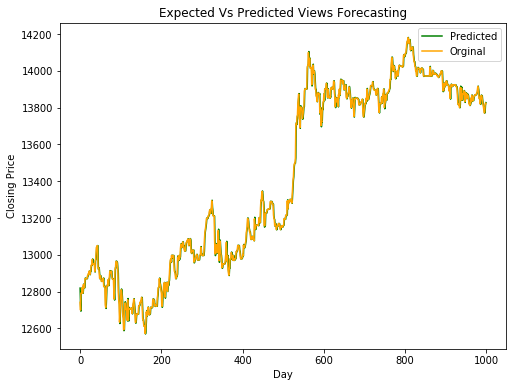

In [71]:
size = int(len(train2.Close_Log)-1000)


# Divide into train and test
train_arima, test_arima = train2.Close_Log[0:size], train2.Close_Log[size:len(train2.Close_Log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()